In [1]:
import sys
import os
import time
searchPath=os.path.abspath('..')
sys.path.append(searchPath)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from knn.knn_base import KNN
from knn.knn_kdtree import KNNKdTree
from utils.data_generater import random_points
from utils.plot import plot_knn_predict

In [3]:
def getData(number):
    data = random_points(2, number)
    label = [0] * (number // 2) + [1] * (number // 2)
    return np.array(data), np.array(label)

In [4]:
dataList = []
labelList = []
for num in [30, 500, 1000, 2000, 5000, 10000, 50000, 400000]:
    data, label = getData(num)
    dataList.append(data)
    labelList.append(label)

In [5]:
models = {"knn":KNN(), "kdtree":KNNKdTree()}

In [6]:
for data, label in zip(dataList, labelList):
    for name, model in models.items():
        startTime = time.time()
        model.fit(data, label)
        for i in range(5):
            model.predict([0.3, 0.2])
        print("model = %s, dataNum = %s, takeTime = %s"%(name, len(data), round(time.time() - startTime, 5)))

model = knn, dataNum = 30, takeTime = 0.00391
model = kdtree, dataNum = 30, takeTime = 0.00417
model = knn, dataNum = 500, takeTime = 0.03806
model = kdtree, dataNum = 500, takeTime = 0.00856
model = knn, dataNum = 1000, takeTime = 0.05203
model = kdtree, dataNum = 1000, takeTime = 0.01386
model = knn, dataNum = 2000, takeTime = 0.1387
model = kdtree, dataNum = 2000, takeTime = 0.02863
model = knn, dataNum = 5000, takeTime = 0.28177
model = kdtree, dataNum = 5000, takeTime = 0.07277
model = knn, dataNum = 10000, takeTime = 0.47404
model = kdtree, dataNum = 10000, takeTime = 0.16433
model = knn, dataNum = 50000, takeTime = 2.0887
model = kdtree, dataNum = 50000, takeTime = 0.93545
model = knn, dataNum = 400000, takeTime = 16.82156
model = kdtree, dataNum = 400000, takeTime = 11.85994


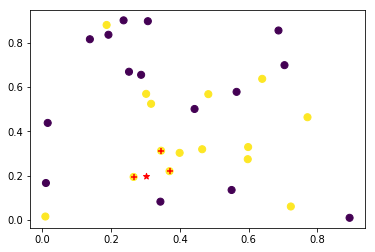

In [7]:
point = (0.3, 0.2)
model = KNNKdTree()
model.fit(dataList[0], labelList[0])
plot_knn_predict(model, dataList[0], labelList[0], point)